<a href="https://colab.research.google.com/github/xhaktmchl/SAI_2020-2_keras_study/blob/main/SAi_keras_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 머신러닝의 분류

###4.1.1 지도 학습(supervised learning)  
: 이미 레이블링된 데이가 주어지면 알고있는 타겟에 입력 데이터를 매핑하는법을 
학습함.  
  요약= 주어진 데이터와 답을 이용해서 새로운 문제의 답을 예측할 수 있도록하는 학습 방법   
  (예  음성인식, 이미지 분류,언어번역 등)

### 4.1.2 비지도 학습
: 타깃이 없고 주어진 데이터의 특징을 찾음.  
(예 : 차원축소, 군집) 


### 4.1.3 자기 지도 학습
: 학습과정에서 사람이 개입하지 않고 경험적인 알고리즘에서 레이블링한 데이터로 학습한다.  
(예: 오토 인코더)

### 4.1.4. 강화학습
: 환경에 대해 보상이 최대화 되는 방향으로 학습.  
(예 : 벽돌깨기 게임)



#4.2 머신러닝 모델 평가
* 데이터를 훈련,검증,테스트 세트로 나눈다.
* 훈련세트에서 학습하고 검증데이터에서 평가한다음 테스트에서 딱한번 테스트 한다.   
이유 -> 검증세트가 없으면 테스트 세트에 과적합돼 새로운 데이터에서 성능 떨어짐

###평가방법
1) 단순 홀드아웃 검증  
: 훈련세트로 훈련시키고 -> 검증세트로 튜닝 -> 훈련,검증세트 합해서 다시 훈련뒤 튜닝 -> 테스트 세트 모델 평가

2) K-겹 교차 검증  
: 데이터 셋을 k개로 나눈 뒤 ->각 i번째 데이터 셋을 제외하고 훈련한 다음-> i번째 검증한다-> 총 k개의 검증점수의 평균점수가 결과

3) 셔플링을 사용한 반복 k-겹 교차 검증
: 매번 셔플링을 한뒤-> k개의 데이터 분할-> k-겹 교차검증 N번 -> N개의 k-겹 
교차검증 점수들의 평균이 결과


### 기억해야 할 것
1) 대표성이 있는 데이터  
: 숫자분류 같은 경우는 무작위로 섞어야 함

2) 시간의 방향  
: 과거로부터 미래예측 데이터는 섞으면 안됨

3) 데이터 중복  
: 훈련세트와 검증세트의 데이터 중복이 있으면 안됨.


#4.3 데이터 전처리, 특성공학, 특성학습

###1) 전처리
* 벡터화  
: 모든 입력과 타깃을 텐서로 바꾸는 것
* 정규화  
: 데이터 값이 크거나 균일하지 않으면 성능이 제대로 안나옴=> 0-1 사이의 값으로
정규화(필요시 평균 0 표준편차 1  
예: x-=x.mean(axis=0), x/=x.std(axis=0)
* 누락값 다루기  
: 누락된 값은 0으로 채우거나 평균 등등 여러 방법으로 채우거나 데이터를 없애준다.


###2) 특성 공학
: 데이터의 특성을 알아내고 표현 하는것 
* 장점: 적은데이터가 있을땐 신경망 보단 특성공학 사용  
(예 : 시간을 나타내는 시계)

#4.4 과대적합 과소적합

  
* 최적화  
: 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
* 일반화  
: 새로운 데이터에서 얼마나 잘 수행되는지를 의미
* 과소적합  
: 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못한 상태
* 과대적합  
:  훈련데이터에 너무 특화되게 학습 된 상태

* 과대적합 해결( => 규제)
 - 더 많은 훈련 데이터
 - 모델의 학습 개수 제한  


In [ ]:
import keras
keras.__version__

'2.4.3'

###4.4.1네트워크 크기 축소
: 모델의 기억 용량이 부족해서는 안 됨. 너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 한다.



3장의 영화리뷰 데이터를 불러온다

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

영화리뷰 예측 모델을 불러온다.

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

모델의 크기를 줄인다

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

원래 모델과 축소 모델의 검증 성능 비교

In [ ]:
# 원래 모델
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4595 - acc: 0.8224 - val_loss: 0.3498 - val_acc: 0.8729
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2678 - acc: 0.9074 - val_loss: 0.3026 - val_acc: 0.8782
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2039 - acc: 0.9278 - val_loss: 0.2792 - val_acc: 0.8894
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1692 - acc: 0.9387 - val_loss: 0.2908 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1461 - acc: 0.9493 - val_loss: 0.3527 - val_acc: 0.8666
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1287 - acc: 0.9553 - val_loss: 0.3303 - val_acc: 0.8767
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1112 - acc: 0.9626 - val_loss: 0.3804 - val_acc: 0.8662
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0986 - a

In [ ]:
# 춗모델의 검증 손실
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 28ms/step - loss: 0.5029 - acc: 0.8094 - val_loss: 0.3932 - val_acc: 0.8718
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3075 - acc: 0.9025 - val_loss: 0.3105 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2352 - acc: 0.9212 - val_loss: 0.2953 - val_acc: 0.8820
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1967 - acc: 0.9331 - val_loss: 0.2789 - val_acc: 0.8908
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1701 - acc: 0.9426 - val_loss: 0.2921 - val_acc: 0.8828
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1505 - acc: 0.9508 - val_loss: 0.3150 - val_acc: 0.8747
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1348 - acc: 0.9559 - val_loss: 0.3047 - val_acc: 0.8799
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1204 - a

이제 그래프로 시각화

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

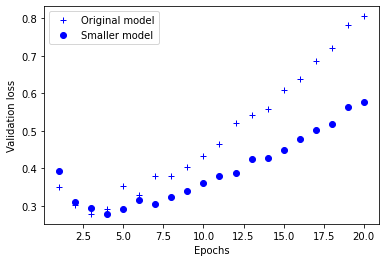

In [ ]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

결과 : 축소된 모델이 과대적합이 적게 일어난다.

이번엔 크기가 큰 모델 비교

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5422 - acc: 0.7878 - val_loss: 0.3786 - val_acc: 0.8336
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2247 - acc: 0.9121 - val_loss: 0.2756 - val_acc: 0.8912
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1172 - acc: 0.9574 - val_loss: 0.4036 - val_acc: 0.8699
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0707 - acc: 0.9824 - val_loss: 0.4454 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1329 - acc: 0.9871 - val_loss: 0.4690 - val_acc: 0.8817
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 9.4853e-04 - acc: 0.9999 - val_loss: 0.6204 - val_acc: 0.8823
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 2.7687e-04 - acc: 1.0000 - val_loss: 0.8281 - val_acc: 0.8823
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 5.

이제 큰모델과 원래 모델의 손실 시각화

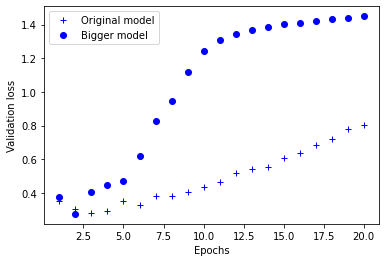

In [ ]:

bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

모델이 클 수록 과대적합이 더 잘 일어난다.

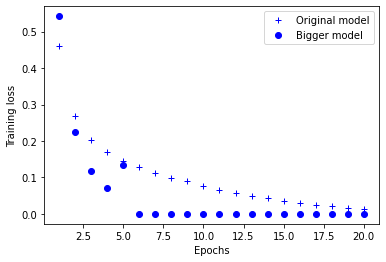

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

훈련손실은 큰 모델이 더욱 0으로 빠르게 수렵한다.  
=> 과대적합이 더 잘 발생하여 검증손실과 훔련손실의 차이가 커진다.

###4.4.2 가중치 규제 추가
: 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것입니다.

* 규제의 종류
 - L1 규제 : 가중치의 절대값에 비례하는 비용이 추가됩니다(가중치의 L1 노름).
 - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됩니다(가중치의 L2 노름).





가중치 규제를 추가하고 

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), # l2(0.001)는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다는 의미
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

모델 검증해보면

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 28ms/step - loss: 0.5172 - acc: 0.8037 - val_loss: 0.3927 - val_acc: 0.8776
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3223 - acc: 0.9028 - val_loss: 0.3910 - val_acc: 0.8571
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2739 - acc: 0.9191 - val_loss: 0.3303 - val_acc: 0.8883
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2513 - acc: 0.9276 - val_loss: 0.3357 - val_acc: 0.8856
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2376 - acc: 0.9336 - val_loss: 0.3413 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2293 - acc: 0.9365 - val_loss: 0.3522 - val_acc: 0.8797
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2229 - acc: 0.9376 - val_loss: 0.3618 - val_acc: 0.8793
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2155 - a

원래 모델과 시각화

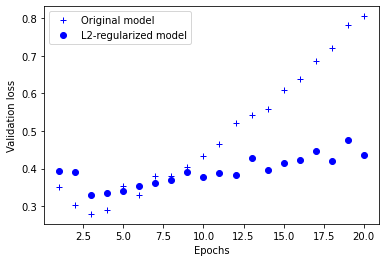

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

 L2 규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있다

### 규제추가 종류에는 3가지

* L1 규제
 - regularizers.l1(0.001)

* L2 규제
 - regularizers.l2(0.001)

* L1과 L2 규제 병행
 - regularizers.l1_l2(l1=0.001, l2=0.001)


###4.4.3 드롭아웃 추가
: 드롭아웃 = 무작위로 일정 비율만큼 출력값을 0 으로 만든다.

// 밑의 과정들을 하는 이유를 모르겟다.
* 훈련할 때 유닛의 출력 중 50%를 버린다
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
테스트할 때는 드롭아웃 비율로 출력을 낮추어 주어야 합니다. 여기에서는 0.5배만큼 스케일을 조정했습니다(앞에서 절반의 유닛을 드롭아웃했으므로):

* 테스트 단계
layer_output *= 0.5
훈련 단계에 이 두 연산을 포함시켜 테스트 단계에는 출력을 그대로 두도록 구현할 수 있습니다.

* 훈련 단계
layer_output *= np.randint(0, high=2, size=layer_output.shape)
* 여기에서 스케일을 낮추는 대신 높입니다![image.png](attachment:image.png)
layer_output /= 0.5 // 여기 이해안감




드롭아웃 추가 방법 model.add(layers.Dropout(0.5))

드롭아웃 추가해보면

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 27ms/step - loss: 0.5859 - acc: 0.6858 - val_loss: 0.4471 - val_acc: 0.8623
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4428 - acc: 0.8129 - val_loss: 0.3396 - val_acc: 0.8834
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3615 - acc: 0.8631 - val_loss: 0.2943 - val_acc: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3084 - acc: 0.8877 - val_loss: 0.2778 - val_acc: 0.8898
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2644 - acc: 0.9090 - val_loss: 0.2838 - val_acc: 0.8875
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2331 - acc: 0.9202 - val_loss: 0.2914 - val_acc: 0.8882
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2120 - acc: 0.9273 - val_loss: 0.3060 - val_acc: 0.8859
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1908 - a

시각화 해보면

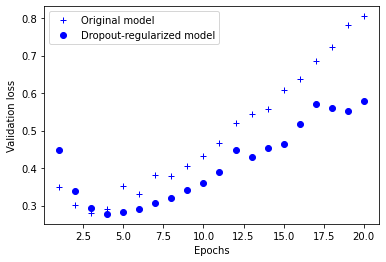

In [ ]:

dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

드롭아웃한 모델이 덜 과대적합된 것을 볼 수 있다.

# 정리
신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법

* 훈련 데이터를 더 모은다.
* 네트워크의 용량을 감소.
* 가중치 규제를 추가.
* 드롭아웃을 추가